# 1 - Preparação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inflection
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
DF_RAW = pd.read_csv('./data/df_raw.csv')
DF_RAW.tail()

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
23146,29588,2017-06-01 10:00:00,2017/06/01,25,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,58.99,58.99,Bestbuy.com,New,...,https://www.bestbuy.com/site/naxa-2-1-channel-...,4.1 pounds,2017/06/01,Thursday,6,June,1,22,-0.715264,34.396428
23147,29589,2017-08-15 15:00:00,2017/08/15,25,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,63.99,58.49,Walmart.com,New,...,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,4.1 pounds,2017/08/15,Tuesday,8,August,15,33,-0.353013,11.434096
23148,29590,2017-07-23 00:00:00,2017/07/23,25,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,63.99,58.49,Walmart.com,New,...,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,4.1 pounds,2017/07/23,Sunday,7,July,23,29,-0.353013,11.434096
23149,29591,2017-11-12 08:00:00,2017/11/12,25,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,81.52,81.52,Walmart.com,New,...,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,4.1 pounds,2017/11/12,Sunday,11,November,12,45,1.128629,11.434096
23150,29592,2017-12-14 06:00:00,2017/12/14,25,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,58.99,58.99,Walmart.com,New,...,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,4.1 pounds,2017/12/14,Thursday,12,December,14,50,-0.775615,11.434096


In [3]:
DF_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23151 non-null  int64  
 1   Date_imp         23151 non-null  object 
 2   Date_imp_d       23151 non-null  object 
 3   Cluster          23151 non-null  int64  
 4   Category_name    23151 non-null  object 
 5   name             23151 non-null  object 
 6   price            23151 non-null  float64
 7   disc_price       23151 non-null  float64
 8   merchant         23151 non-null  object 
 9   condition        23151 non-null  object 
 10  Disc_percentage  23151 non-null  float64
 11  isSale           23151 non-null  object 
 12  Imp_count        23151 non-null  int64  
 13  brand            23151 non-null  object 
 14  p_description    23151 non-null  object 
 15  currency         23151 non-null  object 
 16  dateAdded        23151 non-null  object 
 17  dateSeen    

In [4]:
DF_RAW.describe()

,Unnamed: 0,Cluster,price,disc_price,Disc_percentage,Imp_count,month,day,Week_Number,Zscore_1,price_std
count,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,22980.000000,23151.000000
mean,15338.318431,22.682735,513.037803,494.104295,0.016933,6.560926,7.651030,15.693879,31.342750,0.153249,61.992819
std,8528.805636,15.576818,859.110002,808.588973,0.077849,5.403166,2.592843,9.681622,11.316498,0.863217,125.495128
min,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-2.996396,0.004472
25%,7897.500000,8.000000,82.990000,79.990000,0.000000,2.000000,6.000000,7.000000,23.000000,-0.675928,7.771104
50%,15613.000000,20.000000,199.990000,199.000000,0.000000,5.000000,8.000000,16.000000,32.000000,0.206829,18.764962
75%,22678.000000,35.000000,540.000000,516.490000,0.000000,10.000000,9.000000,24.000000,38.000000,0.707107,59.176162
max,29592.000000,57.000000,10879.950000,10879.950000,0.800000,31.000000,12.000000,31.000000,51.000000,2.999945,1423.902118


In [5]:
DF_RAW.isna().sum()

Unnamed: 0             0
Date_imp               0
Date_imp_d             0
Cluster                0
Category_name          0
name                   0
price                  0
disc_price             0
merchant               0
condition              0
Disc_percentage        0
isSale                 0
Imp_count              0
brand                  0
p_description          0
currency               0
dateAdded              0
dateSeen               0
dateUpdated            0
imageURLs          22696
manufacturer       10639
shipping           11497
sourceURLs          4930
weight                68
Date_imp_d.1           0
Day_n                  0
month                  0
month_n                0
day                    0
Week_Number            0
Zscore_1             171
price_std              0
dtype: int64

# 2 - Limpeza

In [6]:
df_clear = DF_RAW.copy()

In [7]:
# Remove colunas que não serão usadas
df_clear = df_clear.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})
# Altera nome das colunas
snakecase = lambda x: inflection.underscore(x)
cols = list(map(snakecase, df_clear.columns))
df_clear.columns = cols
# Altera tipo de dado
df_clear['date_imp_d'] = pd.to_datetime(df_clear['date_imp_d'])

In [8]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_imp_d       23151 non-null  datetime64[ns]
 1   category_name    23151 non-null  object        
 2   name             23151 non-null  object        
 3   price            23151 non-null  float64       
 4   disc_price       23151 non-null  float64       
 5   merchant         23151 non-null  object        
 6   disc_percentage  23151 non-null  float64       
 7   is_sale          23151 non-null  object        
 8   imp_count        23151 non-null  int64         
 9   brand            23151 non-null  object        
 10  p_description    23151 non-null  object        
 11  date_added       23151 non-null  object        
 12  date_seen        23151 non-null  object        
 13  date_updated     23151 non-null  object        
 14  manufacturer     12512 non-null  objec

In [9]:
df_clear.isna().sum()

date_imp_d             0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

# 3 - Estatística descritiva

In [10]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_imp_d       23151 non-null  datetime64[ns]
 1   category_name    23151 non-null  object        
 2   name             23151 non-null  object        
 3   price            23151 non-null  float64       
 4   disc_price       23151 non-null  float64       
 5   merchant         23151 non-null  object        
 6   disc_percentage  23151 non-null  float64       
 7   is_sale          23151 non-null  object        
 8   imp_count        23151 non-null  int64         
 9   brand            23151 non-null  object        
 10  p_description    23151 non-null  object        
 11  date_added       23151 non-null  object        
 12  date_seen        23151 non-null  object        
 13  date_updated     23151 non-null  object        
 14  manufacturer     12512 non-null  objec

In [11]:
# Separa colunas númericas e categoricas
num_cols = df_clear.select_dtypes( include=['float64', 'int64']).columns.tolist()
cat_cols = df_clear.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]']).columns.tolist()

In [12]:
# Tendencia central e dispersão
df_clear.describe().T

,count,mean,min,25%,50%,75%,max,std
date_imp_d,23151,2017-08-04 22:21:32.211999488,2017-01-05 00:00:00,2017-06-09 00:00:00,2017-08-10 00:00:00,2017-09-24 00:00:00,2017-12-22 00:00:00,NaN
price,23151.0,513.037803,1.0,82.99,199.99,540.0,10879.95,859.110002
disc_price,23151.0,494.104295,1.0,79.99,199.0,516.49,10879.95,808.588973
disc_percentage,23151.0,0.016933,0.0,0.0,0.0,0.0,0.8,0.077849
imp_count,23151.0,6.560926,1.0,2.0,5.0,10.0,31.0,5.403166
month,23151.0,7.65103,1.0,6.0,8.0,9.0,12.0,2.592843
day,23151.0,15.693879,1.0,7.0,16.0,24.0,31.0,9.681622
week_number,23151.0,31.34275,1.0,23.0,32.0,38.0,51.0,11.316498


In [13]:
# Skewness e kurtosis
df_clear[num_cols].agg(['skew', 'kurtosis']).T

,skew,kurtosis
price,4.595160,34.411146
disc_price,4.748349,39.612839
disc_percentage,5.217632,28.754920
imp_count,1.286351,1.639569
month,-0.099417,-0.628859
day,0.032258,-1.331838
week_number,-0.266980,-0.648027


In [14]:
# Range
pd.DataFrame(columns=['Range'], data=(df_clear[num_cols].max() - df_clear[num_cols].min()))

,Range
price,10878.95
disc_price,10878.95
disc_percentage,0.80
imp_count,30.00
month,11.00
day,30.00
week_number,50.00


# 4 - EDA

In [15]:
df_work = df_clear.copy()
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_imp_d       23151 non-null  datetime64[ns]
 1   category_name    23151 non-null  object        
 2   name             23151 non-null  object        
 3   price            23151 non-null  float64       
 4   disc_price       23151 non-null  float64       
 5   merchant         23151 non-null  object        
 6   disc_percentage  23151 non-null  float64       
 7   is_sale          23151 non-null  object        
 8   imp_count        23151 non-null  int64         
 9   brand            23151 non-null  object        
 10  p_description    23151 non-null  object        
 11  date_added       23151 non-null  object        
 12  date_seen        23151 non-null  object        
 13  date_updated     23151 non-null  object        
 14  manufacturer     12512 non-null  objec

Dicionário:
- 'data_imp_d': Data da venda (há 'data_imp_d' repetidos, porem cada linha do DataFrame é uma venda distinta).
- 'merchant': Marketplace onde a venda foi efetuada.
- 'imp_count': ???
- 'disc_price': valor real da venda, levando em conta descontos se aplicados.
- 'day_n': dia da semana da venda.
- 'month_n': mês da venda em extenso.
- 'week_number': semana do ano da venda.
- Demais variáveis são auto-explicativas.

## 4.1 - Perguntas de negócio

- Qual loja ('merchant') mais vendeu?<br>bestbuy.com
<br><br>
- Qual a categoria mais vendida?<br>TV, Television, Video
<br><br>
- Qual a categoria mais vendida em cada uma das 3 lojas que mais vendem?
<br>
    1. Bestbuy.com: 'laptop, computer' 
    2. bhphotovideo.com: 'camera, mirrorless, photo' 
    3. Walmart.com: 'tv, Television, Video'
<br>
- Qual a marca mais vendida?<br>Sony
<br><br>
- Qual dia da semana mais vende?<br>O dia da semana que mais vende é terça-feira.
<br><br>
- Qual semana mais vendeu?<br>A semana 49.
<br><br>
- Qual mês mais vendeu?<br>O mês 8.
<br><br>

### 4.1.1 - Qual loja mais vendeu?

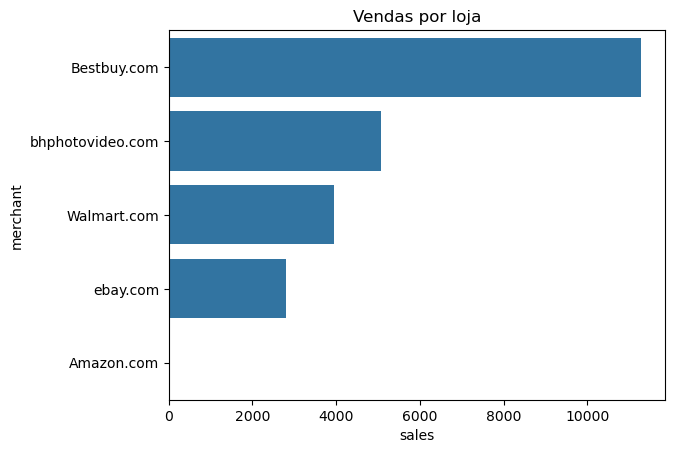

In [16]:
df = df_clear[['date_imp_d', 'merchant']].groupby('merchant').count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df.head(5), y='merchant', x='date_imp_d')
plt.xlabel('sales')
plt.title('Vendas por loja')
# Guarda top3 merchants para usar na pergunta 3
top3_merchant = df.head(3).index.tolist()
plt.show()

### 4.1.2 - Qual a categoria mais vendida?

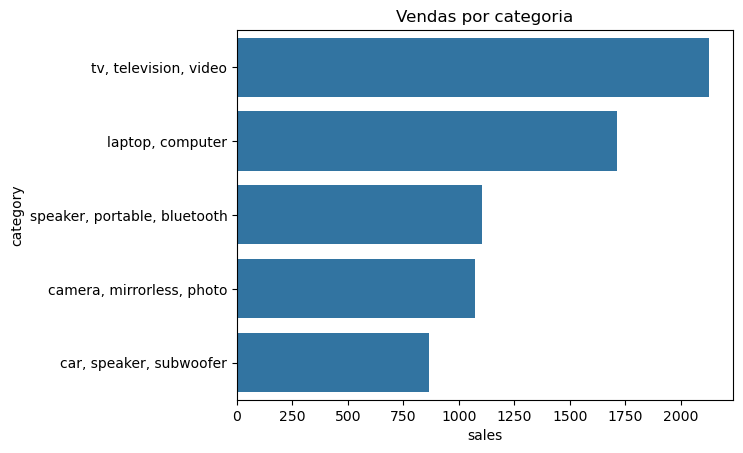

In [17]:
df = df_clear[['date_imp_d', 'category_name']].groupby('category_name').count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df.head(5), y='category_name', x='date_imp_d')
plt.xlabel('sales')
plt.ylabel('category')
plt.title('Vendas por categoria')
plt.show()

### 4.1.2 - Qual a categoria mais vendida para cada uma das 3 lojas que mais vendem?

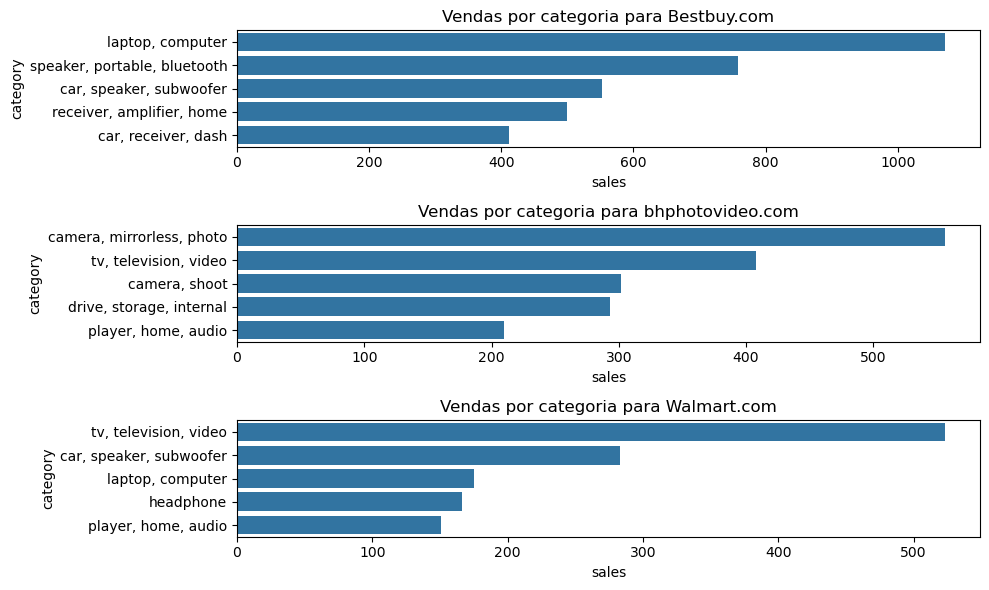

In [18]:
plt.figure(figsize=(10,6))
x = 1
for _ in top3_merchant:
    plt.subplot(3,1,x)
    df = df_clear[df_clear['merchant'] == _][['date_imp_d', 'category_name']].groupby('category_name').count().sort_values(by='date_imp_d', ascending=False)
    sns.barplot(df.head(5), y='category_name', x='date_imp_d')
    plt.title(f"Vendas por categoria para {_}")
    plt.xlabel('sales')
    plt.ylabel('category')
    x += 1
plt.tight_layout()
plt.show()

### 4.1.4 - Qual a marca mais vendida?

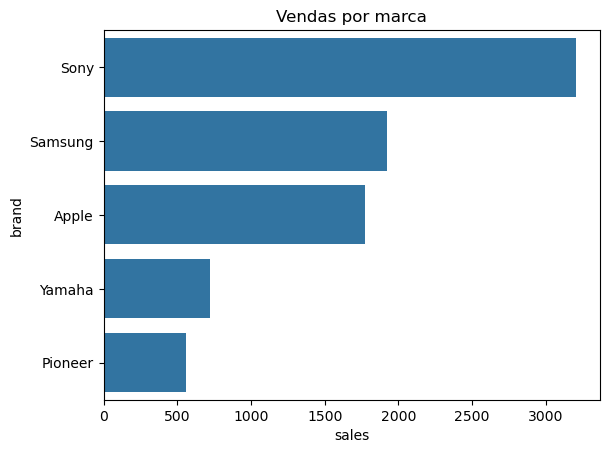

In [19]:
df = df_clear[['date_imp_d', 'brand']].groupby('brand').count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df.head(5), y='brand', x='date_imp_d')
plt.xlabel('sales')
plt.title('Vendas por marca')
plt.show()

### 4.1.5 - Qual dia da semana mais vende?

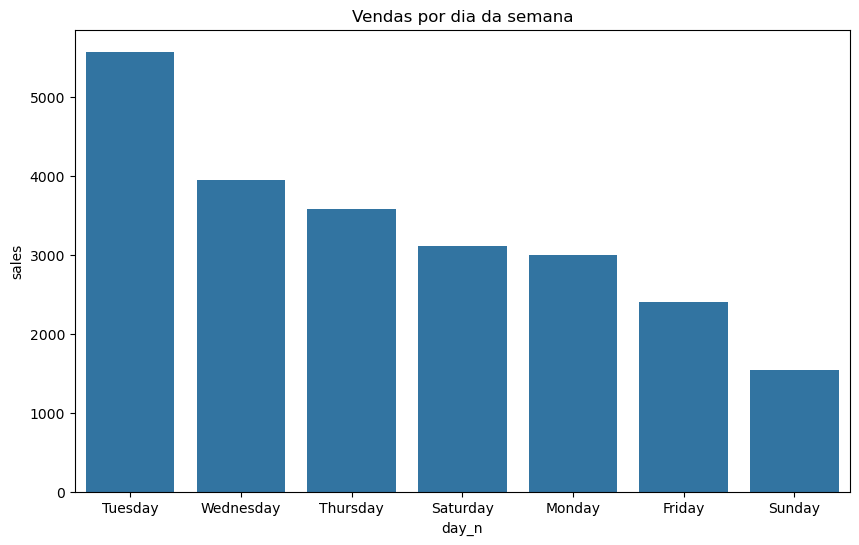

In [20]:
plt.figure(figsize=(10,6))
df = df_clear[['date_imp_d', 'day_n']].groupby(['day_n']).count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df, x='day_n', y='date_imp_d', errorbar=None)
plt.ylabel('sales')
plt.title('Vendas por dia da semana')
plt.show()

### 4.1.5 - Qual semana mais vendeu?

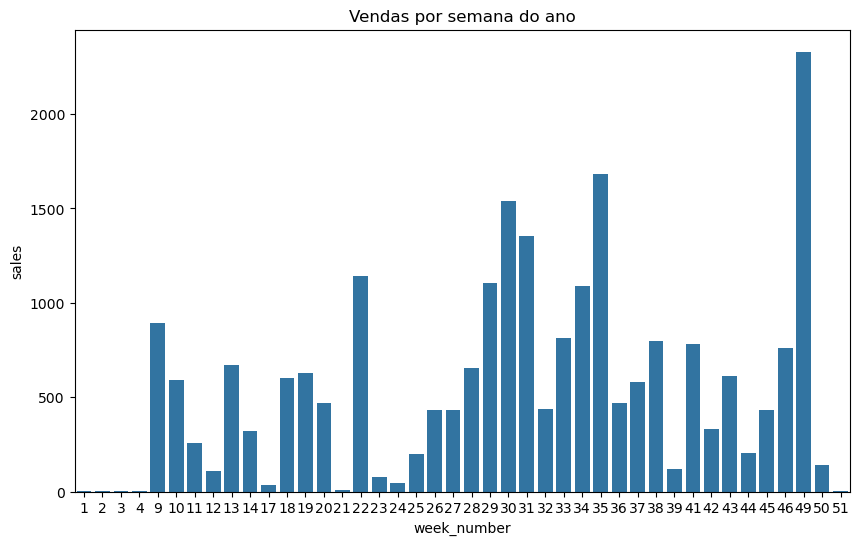

In [21]:
plt.figure(figsize=(10,6))
df = df_clear[['date_imp_d', 'week_number']].groupby(['week_number']).count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df, x='week_number', y='date_imp_d', errorbar=None)
plt.ylabel('sales')
plt.title('Vendas por semana do ano')
plt.show()

### 4.1.6 - Qual mês mais vendeu?

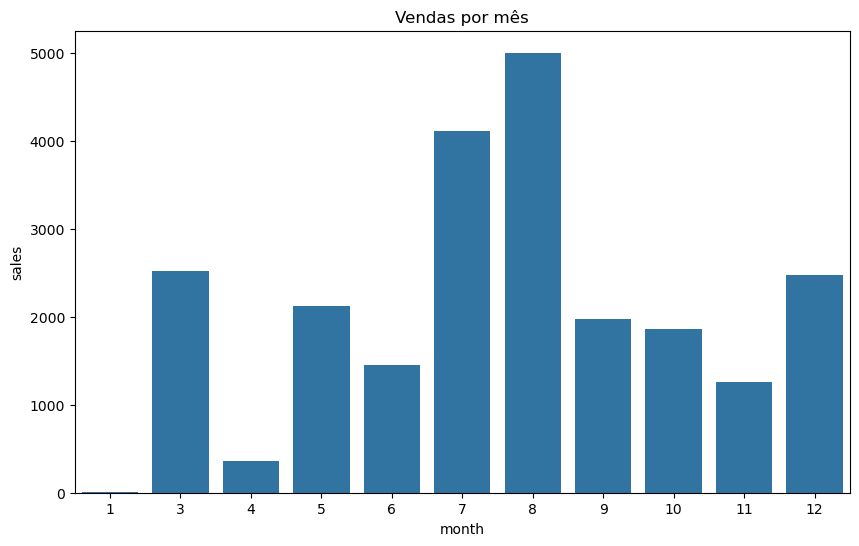

In [22]:
plt.figure(figsize=(10,6))
df = df_clear[['date_imp_d', 'month']].groupby(['month']).count().sort_values(by='date_imp_d', ascending=False)
sns.barplot(df, x='month', y='date_imp_d', errorbar=None)
plt.ylabel('sales')
plt.title('Vendas por mês')
plt.show()

## 5.2 - Univariada

### 5.2.1 - Distribuição da variável resposta - 'disc_price'

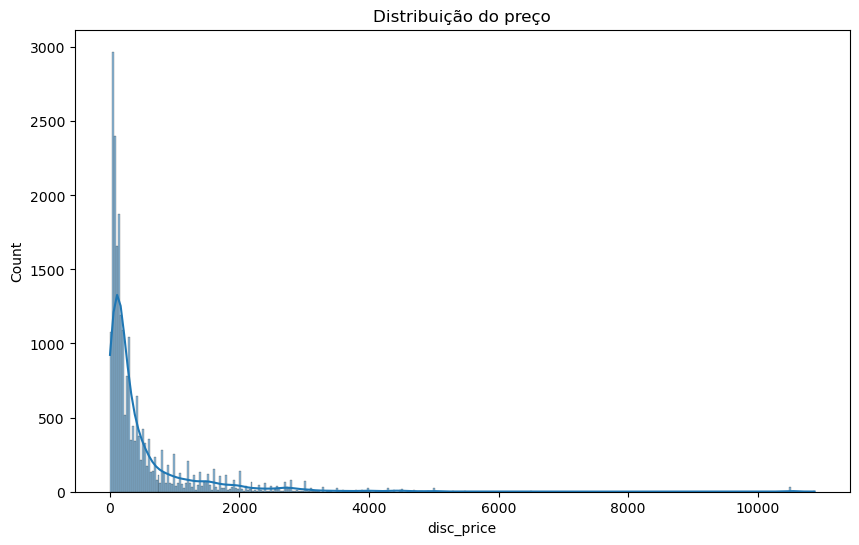

In [23]:
# Distribuição da coluna resposta 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_clear['disc_price'], kde=True)
plt.title('Distribuição do preço')
plt.show()

## 5.3 - Bivariada

### 5.3.1 - Regressão linear entre média de preço e quantidade vendida

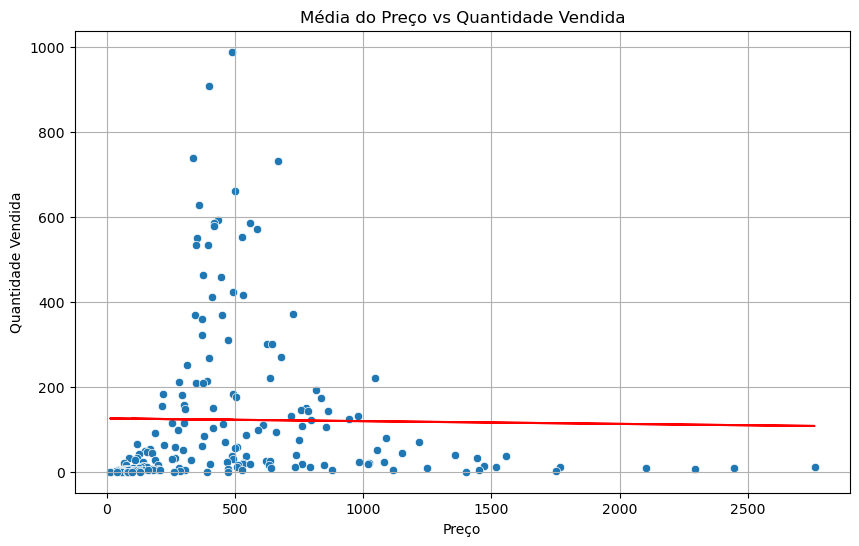

In [24]:
# Contar a quantidade de vendas por data (assumindo que cada linha representa uma venda)
quantidade_vendida = df_clear['date_imp_d'].value_counts().reset_index()
quantidade_vendida.columns = ['date_imp_d', 'quantidade_vendida']
# Calcula preço médio para cada uma das 188 datas observadas
preco = df_clear.groupby('date_imp_d')['disc_price'].mean().reset_index()
# Mesclar os dados de quantidade e preço
dados = pd.merge(quantidade_vendida, preco, on='date_imp_d')
# Criar o modelo de regressão linear
x = dados[['disc_price']]
y = dados['quantidade_vendida']
model = LinearRegression()
model.fit(x, y)
# Plotar a regressão linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disc_price', y='quantidade_vendida', data=dados)
plt.plot(dados['disc_price'], model.predict(x), color='red')
plt.title('Média do Preço vs Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

## 5.4 - Multivariada

# 4 - Engenharia de variáveis

## 4.1 - Filtros

In [25]:
df_ready = df_clear[(df_clear['merchant'] == 'Bestbuy.com') & (df_clear['category_name'] == 'laptop, computer') & (df_clear['name'] == 'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"')][['date_imp_d', 'disc_price', 'name', 'category_name']]

## 4.2 - Transformações

In [26]:
# Criar váriavel com data no formato %m/%d
df_ready['date'] = pd.to_datetime(df_ready['date_imp_d'], format='%m/%d')
# Criar DataFrame para calcular a elasticidade
df_ready = df_ready.groupby(['name', 'date']).agg({'disc_price': 'mean', 'date_imp_d': 'count'}).reset_index().rename(columns={'date_imp_d': 'demand', 'disc_price': 'price'})

## 4.3 - Estatísticas

In [27]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    24 non-null     object        
 1   date    24 non-null     datetime64[ns]
 2   price   24 non-null     float64       
 3   demand  24 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 900.0+ bytes


In [28]:
df_ready.describe()

,date,price,demand
count,24,24.000000,24.000000
mean,2017-06-18 18:00:00,1783.868472,3.875000
min,2017-03-03 00:00:00,1610.740000,1.000000
25%,2017-04-24 06:00:00,1650.865000,2.000000
50%,2017-06-19 12:00:00,1760.906667,4.000000
75%,2017-08-24 06:00:00,1857.490000,4.000000
max,2017-10-10 00:00:00,1999.990000,8.000000
std,NaN,126.363955,1.940697


In [29]:
x = sm.add_constant(df_ready['price'])
y = df_ready['demand']
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.3335
Date:                Thu, 04 Sep 2025   Prob (F-statistic):              0.569
Time:                        02:38:38   Log-Likelihood:                -49.276
No. Observations:                  24   AIC:                             102.6
Df Residuals:                      22   BIC:                             104.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5269      5.811      0.091      0.9